In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import pyscad

In [145]:
reload(pyscad.flint)
from pyscad.flint import flint
reload(pyscad.poly)
from pyscad.poly import Poly
reload(pyscad.nurbs)
from pyscad.nurbs import *

## Testing Rounded Interval Arithmatic

Floating point arithmatic gives some strange behavior.

In [14]:
a = 0.2
b = 0.6
print(f'a={a}, b={b}, a+a+a == b evaluates to : {a+a+a == b}')

a=0.2, b=0.6, a+a+a == b evaluates to : False


Using interval arithmatic we can now make these comparisons

In [15]:
a = flint.frac(2,10)
b = flint.frac(6,10)
print(f'a={a}, b={b}, a+a+a == b evaluates to : {a+a+a == b}')

a=0.200000, b=0.600000, a+a+a == b evaluates to : True


We can also use flints (floating point intervals) in matplotlib graphs

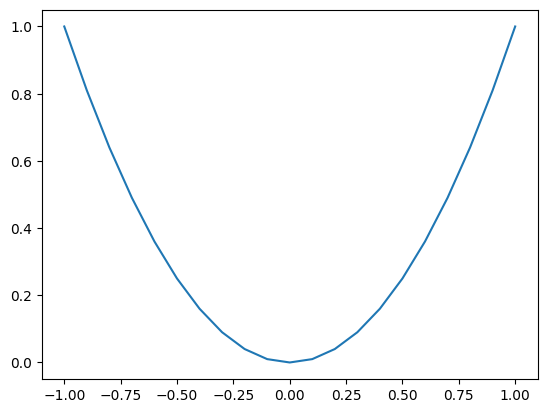

In [17]:
x = [flint(i/10.) for i in range(-10,11)]
y = [xp*xp for xp in x]
plt.plot(x,y)

## Polynomials

Polynomials are a list of coefficients. Can be printed and support polynomial arithmatic.

In [21]:
fa = Poly([1,2,3])
fb = Poly([0,1,3])
print(f'({fa})-({fb}) = {fa-fb}')
f = Poly([1,1])
print(f'({f})({f}) = {f*f}')

(1.00 + 2.00*x + 3.00*x^2)-(1.00*x + 3.00*x^2) = 1.00 + 1.00*x
(1.00 + 1.00*x)(1.00 + 1.00*x) = 1.00 + 2.00*x + 1.00*x^2


Polynomails also support evaluations and derivatives.

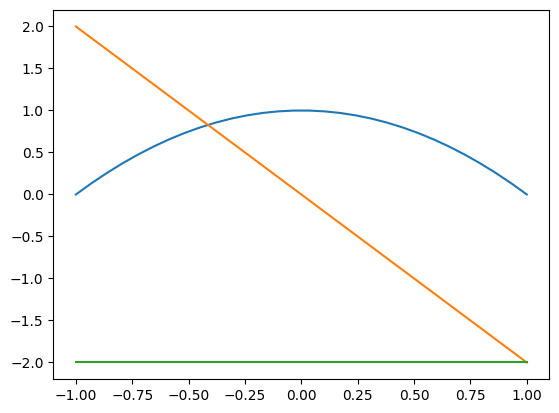

In [86]:
f = Poly([1,0,-1])
x = np.linspace(-1,1,30)
y = f(x)
yp = f.d(x)
ypp = f.d(x,2)
plt.plot(x,y)
plt.plot(x,yp)
plt.plot(x,ypp)

## B-Splines

We can form a basis spline by defining control points and a knot-vector.

In [146]:
# degree
p = 3
# control points
c = np.array([[-2,-1],
              [-3, 3],
              [0,1],
              [3,3],
              [2,-1]])
# knot-vector need p repeated control points at start and finish
t = [0.0]*p + list(np.linspace(0,1,len(c)+1-p)) + [1.0]*p
# Create the spline
b = BSpline(c,p,t)

We can evaluate the spline along its length and plot it.

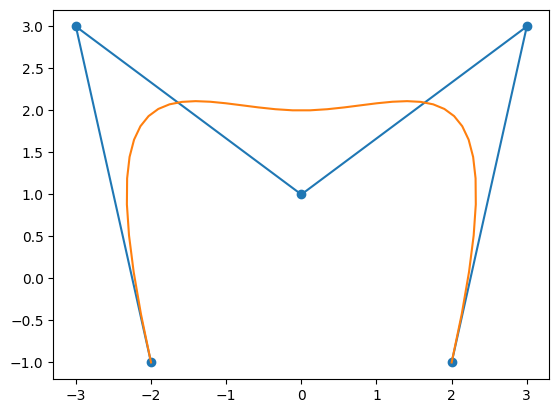

In [147]:
# Get the control points and points along the spline
cpts = b.c
pts = b(np.linspace(0,1,40))
# And plot them
plt.plot(*(cpts.T),'o-')
plt.plot(*(pts.T))

We can also evaluate it's derivatives.

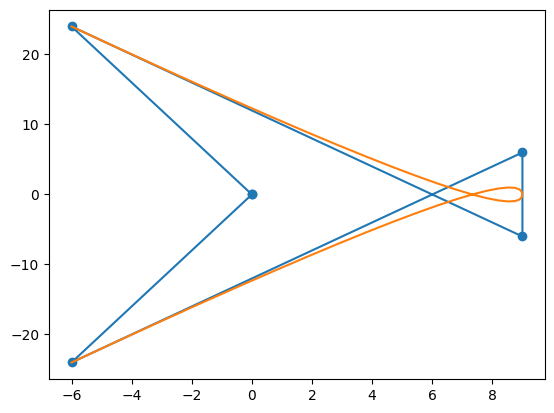

In [139]:
cpts = b.t.d_points(b.p, b.c, 1)
pts = b.d(np.linspace(0,1,40))
plt.plot(*(cpts.T),'o-')
plt.plot(*(pts.T))

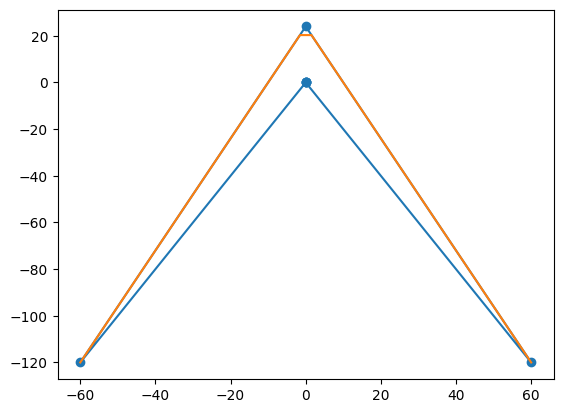

In [140]:
cpts = b.t.d_points(b.p, b.c, 2)
pts = b.d(np.linspace(0,1,40), 2)
plt.plot(*(cpts.T),'o-')
plt.plot(*(pts.T))

## NURBS curves

In [148]:
p = 2
c = [[1,0],[1,1],[0,1]]
w = [1,1/np.sqrt(2),1]
t = [0,0,0,1,1,1]
s = NurbsCurve(c,w,p,t)

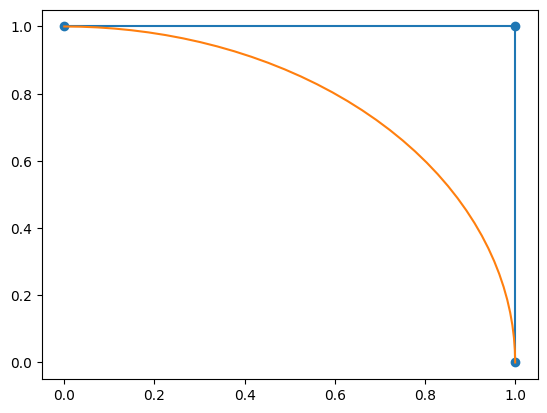

In [149]:
cpts = s.c
pts = s(np.linspace(0,1,40))
plt.plot(*(cpts.T),'o-')
plt.plot(*(pts.T))

We can also evaluate derivatives

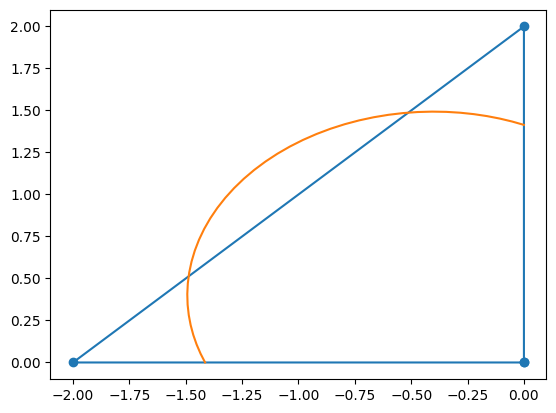

In [150]:
cpts = s.t.d_points(s.p, s.c, 1)
pts = s.d(np.linspace(0,1,40))
plt.plot(*(cpts.T),'o-')
plt.plot(*(pts.T))